# <b> Wholesale customers </b>
---
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [2]:
df=pd.read_csv('Wholesale customers data.csv')
df.head()

Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185

# Data Exploration!

In [3]:
df.shape

(440, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [5]:
for i in df.columns:
    print(i)
    print('---')
    print(df[i].value_counts())
    print('---')
    

Channel
---
1    298
2    142
Name: Channel, dtype: int64
---
Region
---
3    316
1     77
2     47
Name: Region, dtype: int64
---
Fresh
---
9670     2
3        2
18044    2
8040     2
514      2
        ..
18827    1
10405    1
37036    1
30379    1
2787     1
Name: Fresh, Length: 433, dtype: int64
---
Milk
---
3045     2
1610     2
5139     2
2428     2
3587     2
        ..
1596     1
7152     1
13252    1
4280     1
1698     1
Name: Milk, Length: 421, dtype: int64
---
Grocery
---
1664    2
2062    2
683     2
3600    2
6536    2
       ..
7305    1
3343    1
5034    1
8282    1
2510    1
Name: Grocery, Length: 430, dtype: int64
---
Frozen
---
2540    2
425     2
1285    2
4324    2
1619    2
       ..
2995    1
321     1
2279    1
825     1
65      1
Name: Frozen, Length: 426, dtype: int64
---
Detergents_Paper
---
118    2
955    2
256    2
69     2
918    2
      ..
516    1
399    1
51     1
960    1
477    1
Name: Detergents_Paper, Length: 417, dtype: int64
---
Delicassen
---
3 

In [6]:
df.duplicated().sum()

0

In [7]:
df.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [9]:
df.describe()

Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper    Delicassen  
count    440.000000        440.000000    440.000000  
mean    3071.931818       2881.493182   1524.870455  
std     4854.673333       4767.854448   2820.105937  
min       25.000000          3.000000      3.000000  
25%      742.250000        256.750000    408.250000  
50%     1526.000000        816.500000    965.500000  
75%     3554.250000       3922.000000   1820.250000  
max    60869.000000      40827.000000  47943.000000

---
---

# Visualization

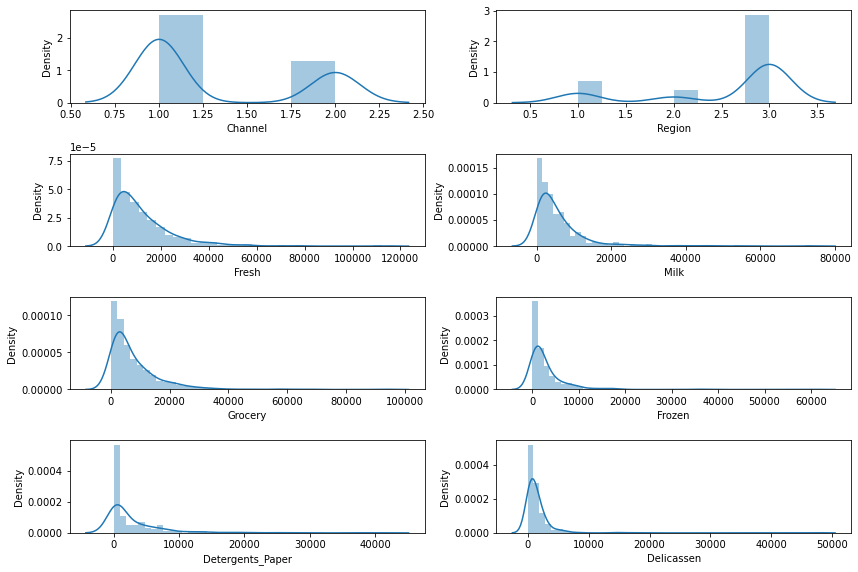

In [10]:
#Distribution of each feature 

i=1
plt.figure(figsize=(12,8))
for col in df.columns:
    plt.subplot(4,2,i)
    sns.distplot(df[col])
    i+=1
plt.tight_layout(pad=0.9)
plt.show()

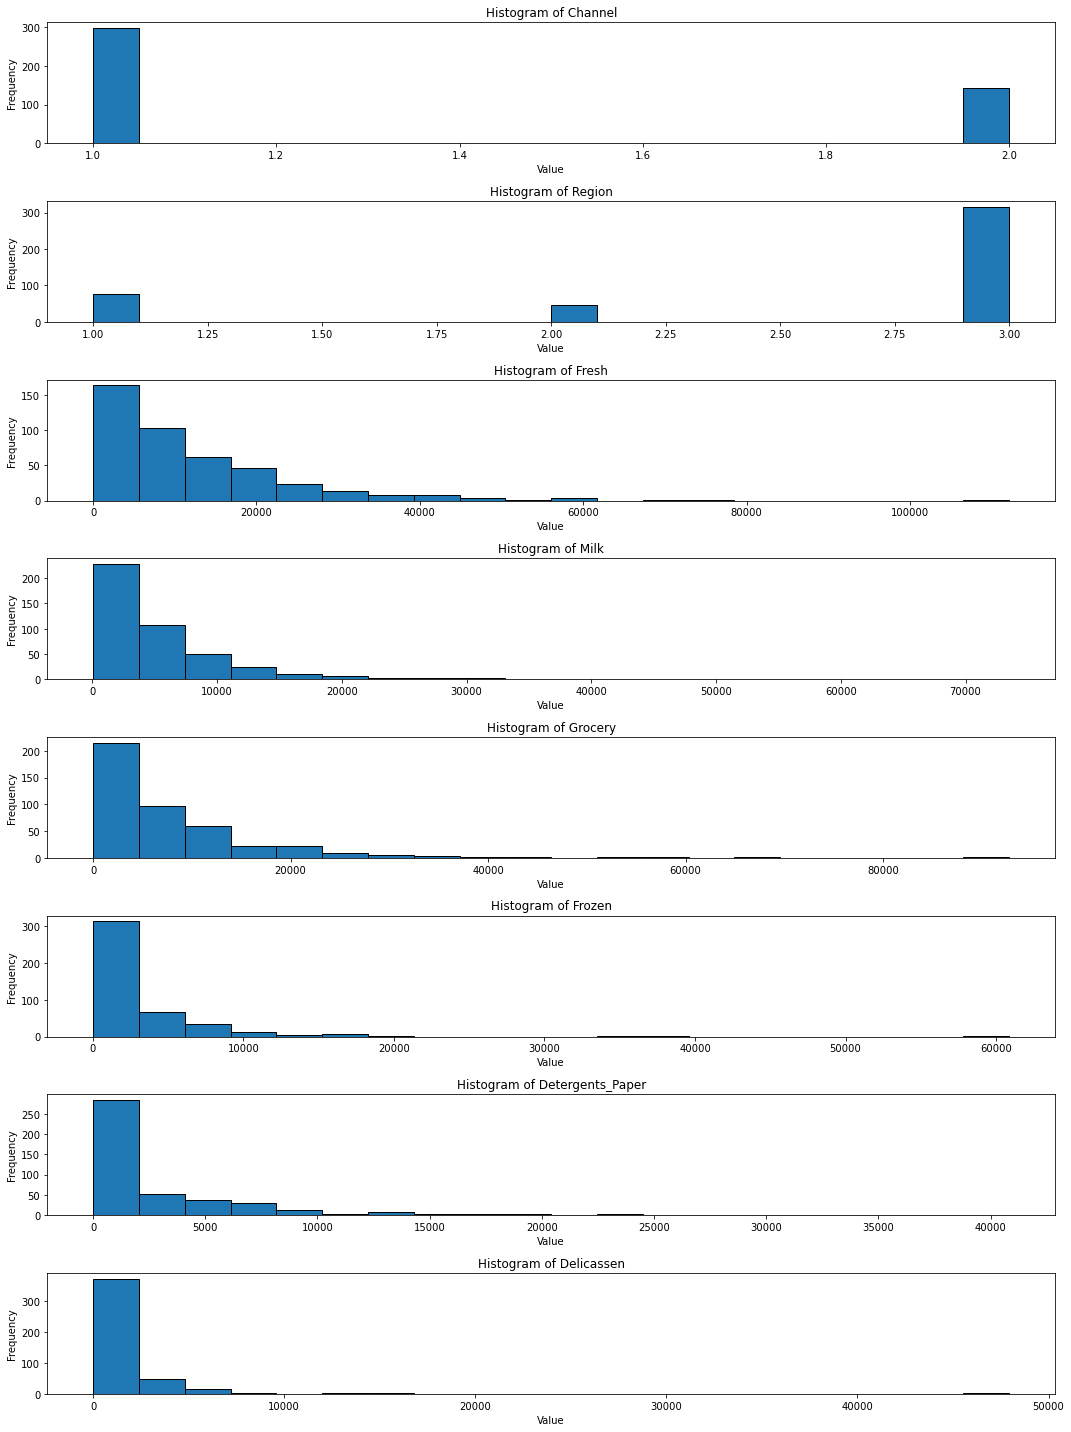

In [11]:
plt.figure(figsize=(15, 20))  

# Plot histograms for each feature
for i, feature in enumerate(df.columns, 1):
    plt.subplot(len(df.columns), 1, i)
    plt.hist(df[feature], bins=20, edgecolor='black')  # Increase bins if needed
    plt.title(f'Histogram of {feature}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

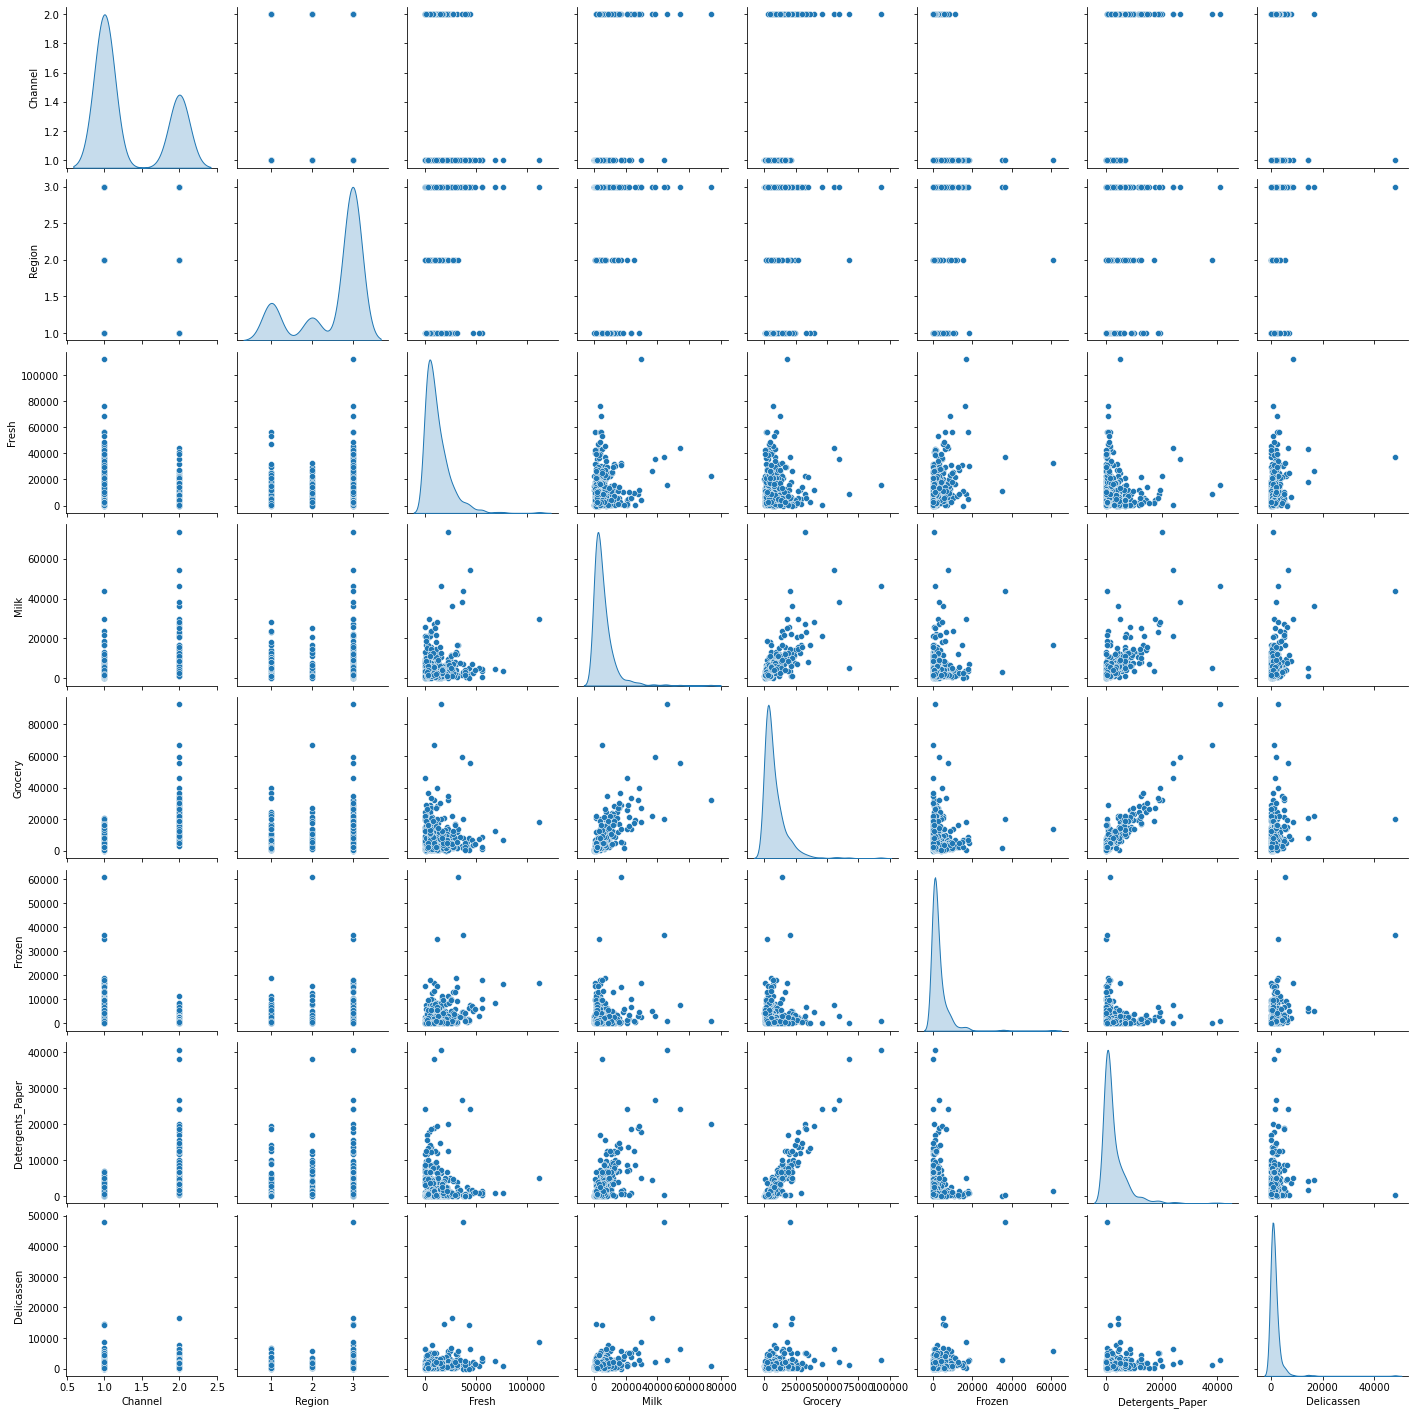

In [12]:
sns.pairplot(df, diag_kind='kde')
plt.show()

In [14]:
df.drop(columns=['Channel','Region'],inplace=True)
df.head()
#Drop the channel and Region columns as we do cluster the customers upon the purchases 

Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0  12669  9656     7561     214              2674        1338
1   7057  9810     9568    1762              3293        1776
2   6353  8808     7684    2405              3516        7844
3  13265  1196     4221    6404               507        1788
4  22615  5410     7198    3915              1777        5185

---
---

# Detecting and Handling the outliers 

In [15]:
# A function to detect the outliers based on the IQR and quantiles
def detect_outliers(data,column):
    q1=data[column].quantile(0.25)
    q3=data[column].quantile(0.75)
    IQR=q3-q1
    lower_bound=q1-IQR*1.5
    upper_bound=q3+IQR*1.5
    outliers=[]
    for value in data[column]:
        if( value> upper_bound) or (value<lower_bound):
            outliers.append(value)
    print(' column : ', column)    
    print('upper_bound is ',upper_bound,' lower_bound is ',  lower_bound)
    print('outliers : ',outliers)

In [16]:
# A function to handle the outliers based on the IQR and quantiles
def handle_outliers(data,column):
    q1=data[column].quantile(0.25)
    q3=data[column].quantile(0.75)
    IQR=q3-q1
    lower_bound=q1-IQR*1.5
    upper_bound=q3+IQR*1.5
    for i in data.index:
        value=data.loc[i,column]
        if(value>upper_bound):
            data.loc[i,column]=upper_bound
        elif(value<lower_bound):
            data.loc[i,column]=lower_bound
    print('Done-->')
 

In [17]:
for i in df.columns:
    detect_outliers(df,i)
    print("-----------------")

 column :  Fresh
upper_bound is  37642.75  lower_bound is  -17581.25
outliers :  [43088, 56159, 44466, 40721, 43265, 56082, 76237, 42312, 45640, 112151, 47493, 56083, 53205, 49063, 68951, 40254, 42786, 39679, 38793, 39228]
-----------------
 column :  Milk
upper_bound is  15676.125  lower_bound is  -6952.875
outliers :  [36423, 20484, 15729, 22044, 54259, 21412, 29892, 38369, 20959, 46197, 73498, 27472, 16729, 15726, 25862, 29627, 43950, 28326, 16599, 23133, 17972, 23527, 20655, 25071, 16784, 18664, 21858, 16687]
-----------------
 column :  Grocery
upper_bound is  23409.875  lower_bound is  -10601.125
outliers :  [25957, 23998, 55571, 28921, 26866, 59598, 45828, 28540, 92780, 32114, 32034, 28986, 34792, 26870, 24708, 23596, 39694, 36486, 33586, 24773, 26839, 67298, 26316, 30243]
-----------------
 column :  Frozen
upper_bound is  7772.25  lower_bound is  -3475.75
outliers :  [9408, 10002, 9510, 7782, 10643, 8872, 8132, 9735, 8693, 35009, 18028, 8853, 16538, 8195, 8425, 16745, 36534, 7

In [18]:
for i in df.columns:
    handle_outliers(df,i)
    print("-----------------")

Done-->
-----------------
Done-->
-----------------
Done-->
-----------------
Done-->
-----------------
Done-->
-----------------
Done-->
-----------------


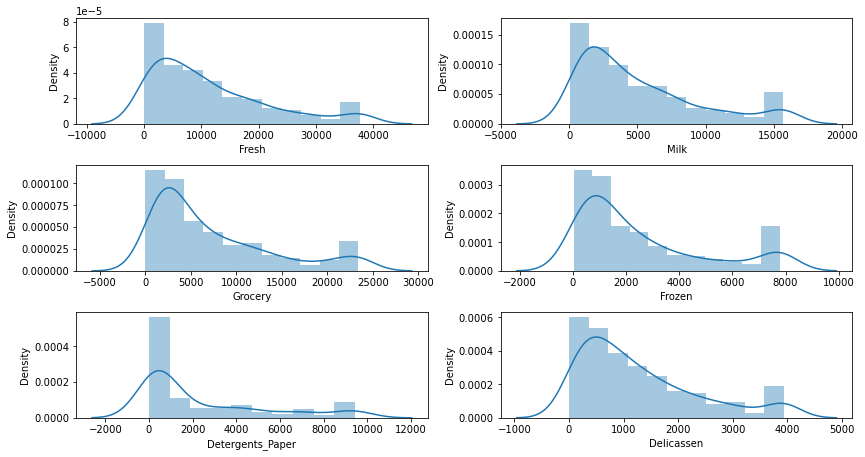

In [19]:
#Distribution of each feature 

i=1
plt.figure(figsize=(12,8))
for col in df.columns:
    plt.subplot(4,2,i)
    sns.distplot(df[col])
    i+=1
plt.tight_layout(pad=0.9)
plt.show()

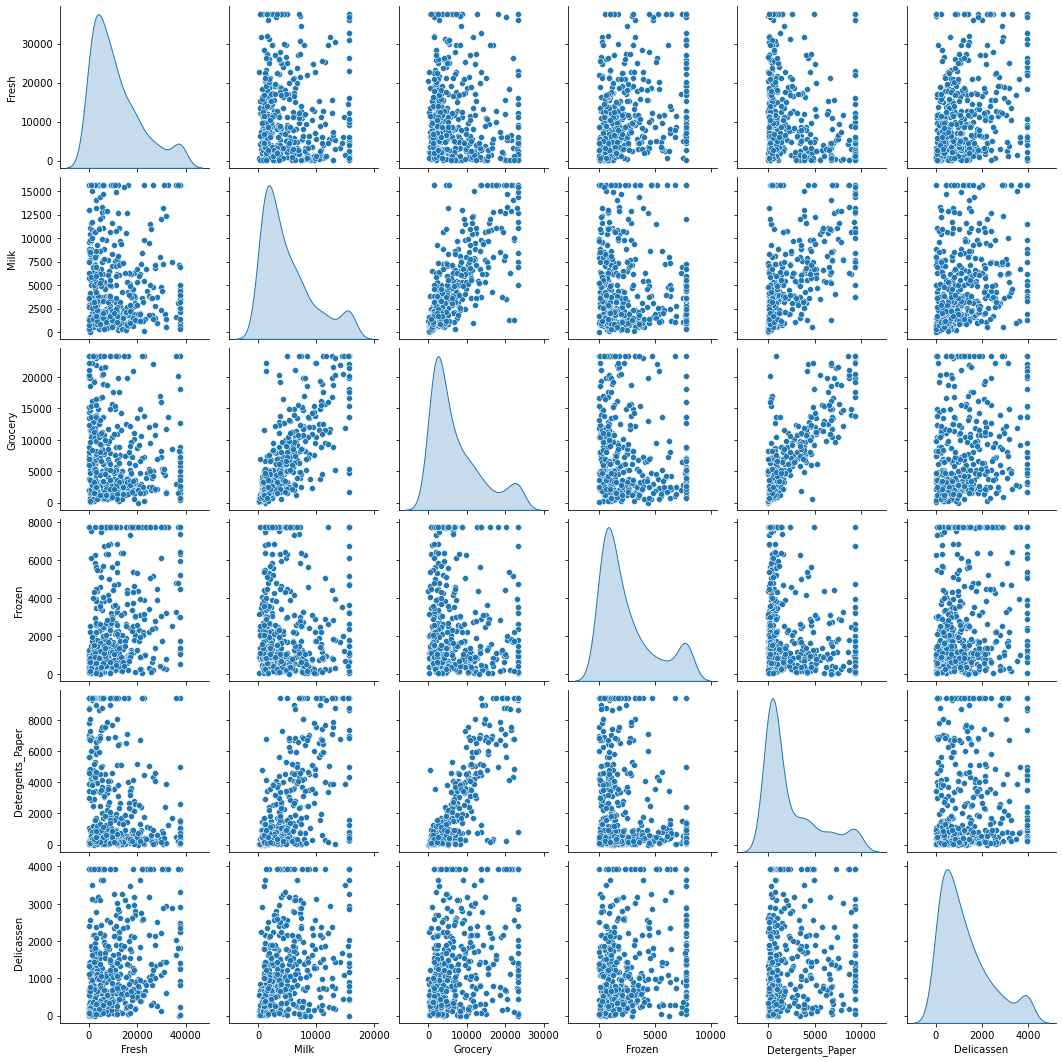

In [20]:
sns.pairplot(df, diag_kind='kde')
plt.show()

---
---

# Scaling

In [21]:
X=df.iloc[:,:]
col=X.columns

In [22]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
X=ms.fit_transform(X)
X

array([[0.33650595, 0.61461642, 0.32289658, 0.02439575, 0.28363974,
        0.33924147],
       [0.18740826, 0.62447487, 0.40864062, 0.22420859, 0.3493728 ,
        0.45054317],
       [0.16870463, 0.56033096, 0.32815145, 0.30720578, 0.37305369,
        1.        ],
       ...,
       [0.38597493, 0.98795701, 1.        , 0.05318016, 1.        ,
        0.47366749],
       [0.2733015 , 0.12329458, 0.09522843, 0.13075607, 0.01752174,
        0.53922877],
       [0.07396436, 0.10517808, 0.10710528, 0.00516312, 0.05033517,
        0.01245156]])

In [23]:
X=pd.DataFrame(X,columns=col)
X

Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen
0    0.336506  0.614616  0.322897  0.024396          0.283640    0.339241
1    0.187408  0.624475  0.408641  0.224209          0.349373    0.450543
2    0.168705  0.560331  0.328151  0.307206          0.373054    1.000000
3    0.352340  0.073042  0.180203  0.823389          0.053521    0.453593
4    0.600748  0.342805  0.307388  0.502114          0.188385    1.000000
..        ...       ...       ...       ...               ...         ...
435  0.789059  0.767934  0.684585  1.000000          0.019008    0.559304
436  1.000000  0.088086  0.032512  0.578915          0.009557    0.595388
437  0.385975  0.987957  1.000000  0.053180          1.000000    0.473667
438  0.273301  0.123295  0.095228  0.130756          0.017522    0.539229
439  0.073964  0.105178  0.107105  0.005163          0.050335    0.012452

[440 rows x 6 columns]

In [24]:
X=X.values
X

array([[0.33650595, 0.61461642, 0.32289658, 0.02439575, 0.28363974,
        0.33924147],
       [0.18740826, 0.62447487, 0.40864062, 0.22420859, 0.3493728 ,
        0.45054317],
       [0.16870463, 0.56033096, 0.32815145, 0.30720578, 0.37305369,
        1.        ],
       ...,
       [0.38597493, 0.98795701, 1.        , 0.05318016, 1.        ,
        0.47366749],
       [0.2733015 , 0.12329458, 0.09522843, 0.13075607, 0.01752174,
        0.53922877],
       [0.07396436, 0.10517808, 0.10710528, 0.00516312, 0.05033517,
        0.01245156]])

 ----
 ----

# Models

# 1-K-Means
> ## Best For:
     Well-Separated Clusters: Works best when clusters are spherical and equally sized.
     Large Datasets: Efficient for large datasets.


## Elbow method to determine the appropriate n_clusters

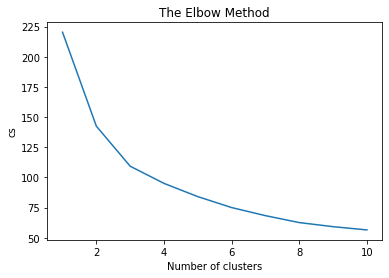

In [25]:
from sklearn.cluster import KMeans
cs=[]
for i in range(1,11):
    Kmeans=KMeans(n_clusters=i, init='k-means++', random_state=0, max_iter=300 )
    Kmeans.fit(X)
    cs.append(Kmeans.inertia_)
    
    
    
plt.plot(range(1,11),cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('cs')
plt.show()

In [26]:
Kmeans=KMeans(n_clusters=4 ,init='k-means++', random_state=0)
Kmeans.fit(X)

KMeans(n_clusters=4, random_state=0)

In [27]:
y_pred=Kmeans.predict(X)
y_pred

array([0, 0, 0, 3, 0, 1, 1, 0, 1, 2, 2, 1, 0, 2, 0, 1, 2, 0, 0, 1, 0, 1,
       3, 0, 0, 1, 1, 1, 2, 1, 0, 1, 1, 3, 1, 1, 0, 2, 2, 3, 3, 0, 2, 2,
       1, 2, 2, 2, 2, 2, 1, 1, 0, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2,
       1, 2, 0, 1, 3, 0, 3, 3, 0, 3, 3, 2, 1, 1, 1, 2, 0, 1, 1, 2, 2, 0,
       3, 0, 1, 3, 2, 3, 2, 1, 1, 1, 1, 3, 2, 2, 0, 3, 1, 1, 2, 2, 1, 2,
       1, 2, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 3, 3, 0, 1, 1, 3, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 3, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 0, 2, 0, 1, 1, 2, 1, 2, 0, 1, 1, 1, 2, 2, 1, 2, 1, 2,
       3, 0, 1, 3, 0, 0, 2, 0, 1, 1, 1, 3, 2, 2, 3, 1, 1, 2, 1, 3, 3, 2,
       1, 1, 2, 2, 0, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 0, 1,
       1, 1, 3, 3, 1, 1, 0, 1, 1, 3, 3, 1, 1, 1, 3, 1, 1, 3, 1, 3, 3, 1,
       1, 0, 0, 2, 1, 1, 1, 3, 1, 2, 3, 0, 0, 3, 1, 3, 3, 3, 1, 3, 1, 1,
       2, 0, 2, 0, 2, 1, 3, 1, 1, 3, 1, 1, 3, 3, 3, 0, 1, 0, 3, 3, 3, 1,
       1, 3, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0,

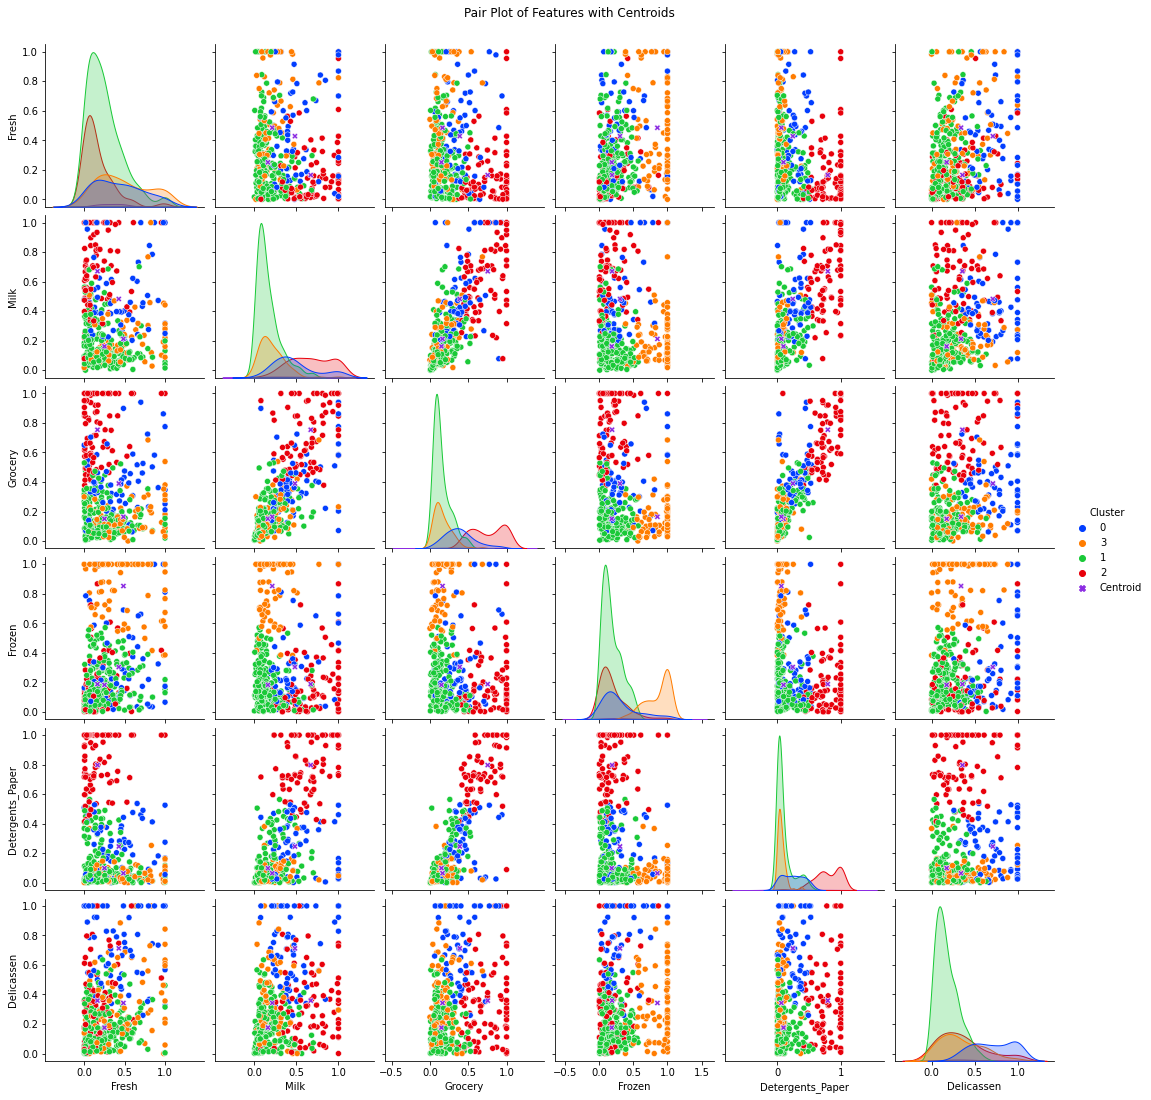

In [30]:
features = df.columns
data = pd.DataFrame(X, columns=features)

data['Cluster'] = y_pred

centroids_df = pd.DataFrame(Kmeans.cluster_centers_, columns=features)
centroids_df['Cluster'] = ['Centroid'] * Kmeans.n_clusters

combined_df = pd.concat([data, centroids_df], ignore_index=True)

sns.pairplot(combined_df, hue='Cluster', palette='bright', markers=['o']*Kmeans.n_clusters + ['X'])

plt.suptitle('Pair Plot of Features with Centroids', y=1.02)
plt.show()

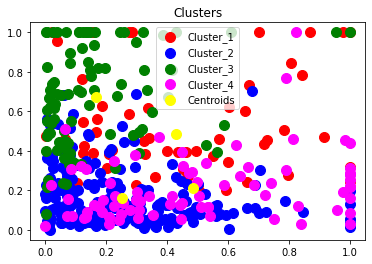

In [31]:
plt.scatter(X[y_pred==0, 0], X[y_pred==0, 1], s=100, c='red', label='Cluster_1')
plt.scatter(X[y_pred==1, 0], X[y_pred==1, 1], s=100, c='blue', label='Cluster_2')
plt.scatter(X[y_pred==2, 0], X[y_pred==2, 1], s=100, c='green', label='Cluster_3')
plt.scatter(X[y_pred==3, 0], X[y_pred==3, 1], s=100, c='Magenta', label='Cluster_4')

plt.scatter(Kmeans.cluster_centers_[:,0],Kmeans.cluster_centers_[:,1],s=100,c='yellow',label='Centroids')
plt.title('Clusters')
plt.legend()
plt.show()

# 3D scatter plot

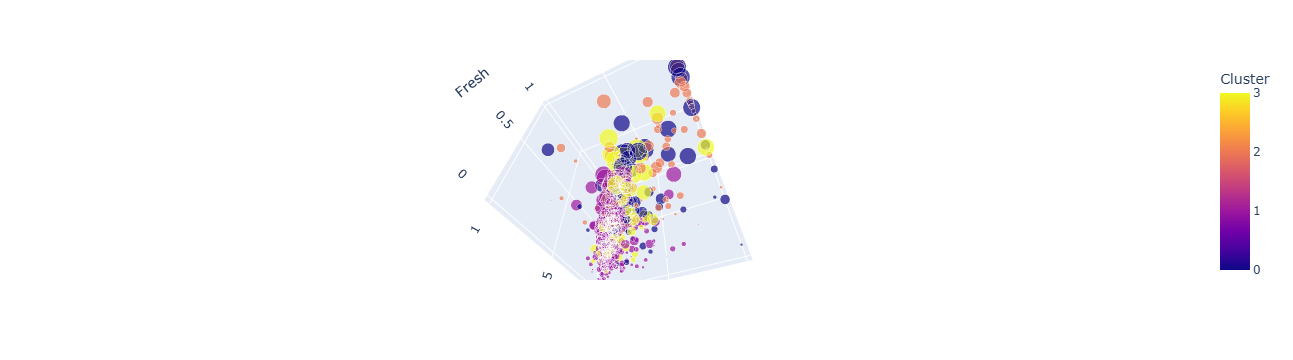

In [36]:
import plotly.express as px
fig = px.scatter_3d(data, x="Grocery", y="Milk", z="Fresh", color='Cluster', size="Fresh", size_max=30)
fig.show()

---
---

# DBSCAN
> ## Best For:
     Irregularly Shaped Clusters: Good for clusters of varying shapes and sizes.
     Data with Noise: Can identify and exclude outliers (noise)

In [37]:
X=df.iloc[:,:]
col=X.columns

In [38]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
X=ms.fit_transform(X)
X

array([[0.33650595, 0.61461642, 0.32289658, 0.02439575, 0.28363974,
        0.33924147],
       [0.18740826, 0.62447487, 0.40864062, 0.22420859, 0.3493728 ,
        0.45054317],
       [0.16870463, 0.56033096, 0.32815145, 0.30720578, 0.37305369,
        1.        ],
       ...,
       [0.38597493, 0.98795701, 1.        , 0.05318016, 1.        ,
        0.47366749],
       [0.2733015 , 0.12329458, 0.09522843, 0.13075607, 0.01752174,
        0.53922877],
       [0.07396436, 0.10517808, 0.10710528, 0.00516312, 0.05033517,
        0.01245156]])

In [39]:
X=pd.DataFrame(X,columns=col)
X

Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen
0    0.336506  0.614616  0.322897  0.024396          0.283640    0.339241
1    0.187408  0.624475  0.408641  0.224209          0.349373    0.450543
2    0.168705  0.560331  0.328151  0.307206          0.373054    1.000000
3    0.352340  0.073042  0.180203  0.823389          0.053521    0.453593
4    0.600748  0.342805  0.307388  0.502114          0.188385    1.000000
..        ...       ...       ...       ...               ...         ...
435  0.789059  0.767934  0.684585  1.000000          0.019008    0.559304
436  1.000000  0.088086  0.032512  0.578915          0.009557    0.595388
437  0.385975  0.987957  1.000000  0.053180          1.000000    0.473667
438  0.273301  0.123295  0.095228  0.130756          0.017522    0.539229
439  0.073964  0.105178  0.107105  0.005163          0.050335    0.012452

[440 rows x 6 columns]

In [40]:
X=X.values
X

array([[0.33650595, 0.61461642, 0.32289658, 0.02439575, 0.28363974,
        0.33924147],
       [0.18740826, 0.62447487, 0.40864062, 0.22420859, 0.3493728 ,
        0.45054317],
       [0.16870463, 0.56033096, 0.32815145, 0.30720578, 0.37305369,
        1.        ],
       ...,
       [0.38597493, 0.98795701, 1.        , 0.05318016, 1.        ,
        0.47366749],
       [0.2733015 , 0.12329458, 0.09522843, 0.13075607, 0.01752174,
        0.53922877],
       [0.07396436, 0.10517808, 0.10710528, 0.00516312, 0.05033517,
        0.01245156]])

In [44]:
from sklearn.cluster import DBSCAN
model=DBSCAN(eps=0.5,min_samples=80)
model.fit(X)

DBSCAN(min_samples=80)

In [45]:
y_pred=model.fit_predict(X)
y_pred

array([ 0,  0, -1,  0, -1,  0,  0,  0,  0, -1, -1,  0, -1, -1, -1,  0,  0,
       -1,  0,  0,  0,  0, -1, -1, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0,
        0,  0, -1, -1, -1, -1, -1,  0, -1, -1,  0, -1, -1, -1,  0, -1,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0, -1,  0, -1,  0,  0,
       -1,  0,  0, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0,
       -1, -1, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0, -1, -1,
        0, -1,  0,  0,  0, -1,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1, -1,  0,  0, -1,  0,  0,  0, -1,  0, -1, -1,  0,  0,  0,
       -1, -1,  0, -1,  0,  0, -1,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,
       -1,  0,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0,  0, -1, -1, -1,  0,
        0, -1,  0,  0,  0, -1,  0, -1,  0,  0,  0, -1, -1,  0, -1,  0,  0,
        0,  0,  0,  0,  0

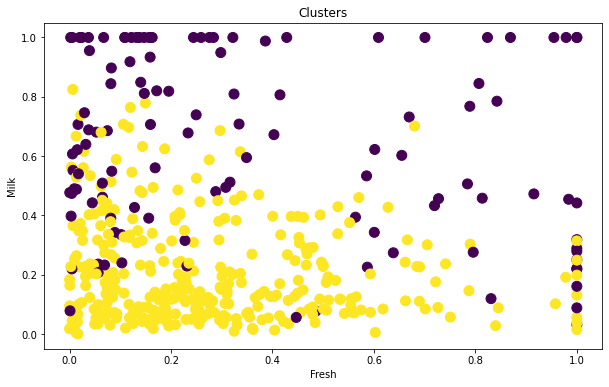

In [51]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y_pred,s=100,cmap='viridis')
plt.title('Clusters')
plt.xlabel('Fresh')
plt.ylabel('Milk')
plt.show()

## DBSCAN is clustering upon distribution. As a result, clusters here are not well defined unlike k-means


---
---

# Hierarchal
> ## Best For:
     Small to Medium Datasets: Computationally expensive, so best for smaller datasets.
     Hierarchy Visualization: Useful when you need to visualize the data's natural hierarchy.
     Clusters of Varying Sizes: Can capture clusters of varying sizes and shapes.

In [52]:
X=X=df.iloc[:,:]
X

Fresh     Milk    Grocery   Frozen  Detergents_Paper  Delicassen
0    12669.00   9656.0   7561.000   214.00          2674.000     1338.00
1     7057.00   9810.0   9568.000  1762.00          3293.000     1776.00
2     6353.00   8808.0   7684.000  2405.00          3516.000     3938.25
3    13265.00   1196.0   4221.000  6404.00           507.000     1788.00
4    22615.00   5410.0   7198.000  3915.00          1777.000     3938.25
..        ...      ...        ...      ...               ...         ...
435  29703.00  12051.0  16027.000  7772.25           182.000     2204.00
436  37642.75   1431.0    764.000  4510.00            93.000     2346.00
437  14531.00  15488.0  23409.875   437.00          9419.875     1867.00
438  10290.00   1981.0   2232.000  1038.00           168.000     2125.00
439   2787.00   1698.0   2510.000    65.00           477.000       52.00

[440 rows x 6 columns]

In [53]:
X=X.values
X

array([[12669.   ,  9656.   ,  7561.   ,   214.   ,  2674.   ,  1338.   ],
       [ 7057.   ,  9810.   ,  9568.   ,  1762.   ,  3293.   ,  1776.   ],
       [ 6353.   ,  8808.   ,  7684.   ,  2405.   ,  3516.   ,  3938.25 ],
       ...,
       [14531.   , 15488.   , 23409.875,   437.   ,  9419.875,  1867.   ],
       [10290.   ,  1981.   ,  2232.   ,  1038.   ,   168.   ,  2125.   ],
       [ 2787.   ,  1698.   ,  2510.   ,    65.   ,   477.   ,    52.   ]])

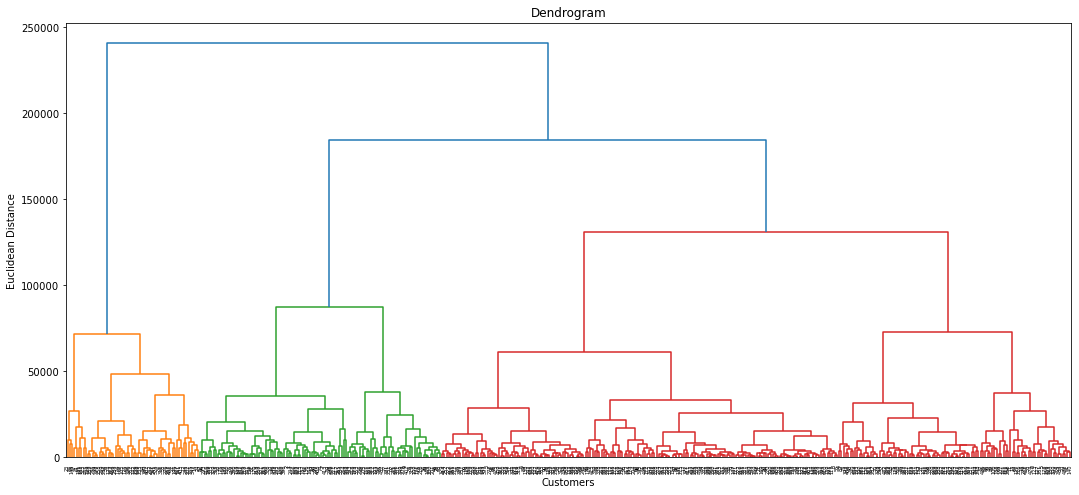

In [54]:
import scipy.cluster.hierarchy as sc

# Assuming X is your data, make sure X is properly scaled and preprocessed

plt.figure(figsize=(18, 8))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distance")

# Perform hierarchical clustering using Ward's method
linkage_matrix = sc.linkage(X, method="ward")

# Create and plot the dendrogram
sc.dendrogram(linkage_matrix)

# Show the plot
plt.show()


In [55]:
from sklearn.cluster import AgglomerativeClustering
model=AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="ward")
model.fit_predict(X)
labels=model.labels_

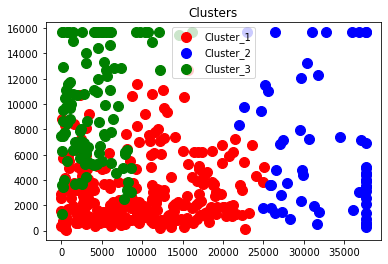

In [56]:
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=100, c='red', label='Cluster_1')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=100, c='blue', label='Cluster_2')
plt.scatter(X[labels==2, 0], X[labels==2, 1], s=100, c='green', label='Cluster_3')


plt.title('Clusters')
plt.legend()
plt.show()

---
---